In [16]:
# Importing the Multi-Task Convolutional Neural Network (MTCNN) for face detection and extraction

import os
import keras

import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from PIL import Image
from mtcnn import MTCNN
print(keras.__version__)

2.4.2


In [2]:
# Load the model
# the compile = False flag is to prevent a warning message - No training configuration found in the save file

path_to_model = "/home/jose/Documents/IPD441/Proyecto/keras-facenet/model/facenet_keras.h5"
model = load_model(path_to_model)

In [3]:
# Summarize input and output shapes
print(model.inputs)
print(model.outputs)
print(type(model))

[<tf.Tensor 'input_1:0' shape=(None, 160, 160, 3) dtype=float32>]
[<tf.Tensor 'Bottleneck_BatchNorm/Identity:0' shape=(None, 128) dtype=float32>]
<class 'tensorflow.python.keras.engine.training.Model'>


2.4.2


# 1) Face Extraction (using MTCNN)

In [5]:
# Extracting a face
face_path = "/home/jose/Documents/IPD441/Proyecto/imgs/1_kiko_loureiro.jpg"
#face_path = "/home/jose/Documents/IPD441/Proyecto/imgs/2_ozzy.jpeg"
img = Image.open(face_path)
img = img.convert('RGB')
pixels = np.asarray(img)
#pixels = plt.imread(face_path)
#pixels = cv2.cvtColor(cv2.imread(face_path), cv2.COLOR_BGR2RGB)

# Creating the detector
detector = MTCNN()
results = detector.detect_faces(pixels)
img.show()

In [6]:
# It's a JSON format with the bounding box coords of the face detected
print(results)

# Extracting the bounding box from the first face
x1, y1, width, height = results[0]["box"]
# Bug fix
x1, y1 = abs(x1), abs(y1)
x2, y2 = x1 + width, y1 + height
print(x1)
print(y1)
print(x2)
print(y2)

# Face extraction from img
face = pixels[y1:y2, x1:x2] # These are just the pixels, as np.array

# Resize pixels of img to the model input size
actual_face = Image.fromarray(face)
actual_face = actual_face.resize((160,160))
face_array = np.asarray(actual_face)
actual_face.show()

[{'box': [275, 81, 125, 171], 'confidence': 0.9982905983924866, 'keypoints': {'left_eye': (299, 152), 'right_eye': (353, 137), 'nose': (328, 177), 'mouth_left': (321, 215), 'mouth_right': (366, 201)}}]
275
81
400
252


In [18]:
# Extract a single face from a given img
def extract_face(filename, required_size = (160,160)):
    img = Image.open(filename)
    img = img.convert("RGB")
    #print("THIS IS IMG RGB")
    #print(img)
    pixels = np.asarray(img)
    #plt.imshow(img)
    #plt.show()
    detector = MTCNN()
    results = detector.detect_faces(pixels)
    #print(results)
    x1, y1, width, height = results[0]["box"]
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    face = pixels[y1:y2, x1:x2]
    actual_face = Image.fromarray(face)
    actual_face = actual_face.resize(required_size)
    face_array = np.asarray(actual_face)
    return face_array

# Load the img and extract the face
#face = extract_face("/home/jose/Documents/IPD441/Proyecto/imgs/1_kiko_loureiro.jpg")
#Image.fromarray(face).show()

(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)


(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)


(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)


(160, 160, 3)
(160, 160, 3)


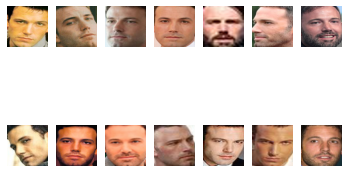

In [8]:
# Using the 5-celebrity-faces-dataset

folder = "../data/5-celebrity-faces-dataset/train/ben_afflek/"
i = 1

print

# Get files
for filename in os.listdir(folder):
    path = folder + filename
    face = extract_face(path)
    plt.subplot(2, 7, i)
    plt.axis("off")
    plt.imshow(face)
    print(face.shape)
    i += 1
plt.show()

In [9]:
print(os.listdir("../data/5-celebrity-faces-dataset/train/ben_afflek/"))
print(len(os.listdir("../data/5-celebrity-faces-dataset/train/ben_afflek/")))

['httpwwwaceshowbizcomimagesphotobenaffleckjpg.jpg', 'httpwwwhillsindcomstorebenjpg.jpg', 'httptrwebimgacstanetcxbdddmediasnmediajpg.jpg', 'httpimagesfandangocomrImageRendererredesignstaticimgnoxportraitjpgpcpcpcimagesmasterrepositoryperformerimagespjpg.jpg', 'httpssmediacacheakpinimgcomxdbbdbbbececacdecdcdfjpg.jpg', 'httpssmediacacheakpinimgcomxedaedabcbefbcbabbjpg.jpg', 'httpsuploadwikimediaorgwikipediacommonsthumbddBenAffleckbyGageSkidmorejpgpxBenAffleckbyGageSkidmorejpg.jpg', 'httpcsvkmeuaeccjpg.jpg', 'httpwwwallposterscomimagesPostersPFjpg.jpg', 'httpwwwrumenewscomwpcontentuploadsbenafflekxpng.jpg', 'httpssmediacacheakpinimgcomxeeedcacddeccccacfjpg.jpg', 'httpssmediacacheakpinimgcomxeebdfdbaaajpg.jpg', 'httpssmediacacheakpinimgcomxdfdfadcfeabjpg.jpg', 'httpwwwfilmscoopitcgibinattoriBENAFFLECKBENAFFLECKjpg.jpg']
14


In [19]:
# Automate the above process
def load_faces(directory):
    faces = list()
    for filename in os.listdir(directory):
        path = directory + filename
        print(path)
        face = extract_face(path)
        faces.append(face)
    return faces

def load_dataset(directory):
    X, y = list(), list()
    for subdir in os.listdir(directory):
        #print(subdir)
        path = directory + subdir + "/"
        
        #print(path)
        
        if not os.path.isdir(path):
            continue
        
        faces = load_faces(path)
        labels = [subdir for _ in range(len(faces))]
        print(labels)
        print(">loaded %d examples for class: %s" % (len(faces), subdir))
        X.extend(faces)
        y.extend(labels)
    print(np.asarray(y))
    return np.asarray(X), np.asarray(y)

In [11]:
# Now, let's generate our datasets !!
trainX, trainy = load_dataset('../data/5-celebrity-faces-dataset/train/')
print(trainX.shape, trainy.shape)
testX, testy = load_dataset("../data/5-celebrity-faces-dataset/val/")
print(testX.shape, testy.shape)
np.savez_compressed('5-celebrity-faces-dataset.npz', trainX, trainy, testX, testy)

['ben_afflek', 'ben_afflek', 'ben_afflek', 'ben_afflek', 'ben_afflek', 'ben_afflek', 'ben_afflek', 'ben_afflek', 'ben_afflek', 'ben_afflek', 'ben_afflek', 'ben_afflek', 'ben_afflek', 'ben_afflek']
>loaded 14 examples for class: ben_afflek


['elton_john', 'elton_john', 'elton_john', 'elton_john', 'elton_john', 'elton_john', 'elton_john', 'elton_john', 'elton_john', 'elton_john', 'elton_john', 'elton_john', 'elton_john', 'elton_john', 'elton_john', 'elton_john', 'elton_john']
>loaded 17 examples for class: elton_john


['madonna', 'madonna', 'madonna', 'madonna', 'madonna', 'madonna', 'madonna', 'madonna', 'madonna', 'madonna', 'madonna', 'madonna', 'madonna', 'madonna', 'madonna', 'madonna', 'madonna', 'madonna', 'madonna']
>loaded 19 examples for class: madonna


['jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld']
>loaded 21 examples for class: jerry_seinfeld


['mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling']
>loaded 22 examples for class: mindy_kaling
['ben_afflek' 'ben_afflek' 'ben_afflek' 'ben_afflek' 'ben_afflek'
 'ben_afflek' 'ben_afflek' 'ben_afflek' 'ben_afflek' 'ben_afflek'
 'ben_afflek' 'ben_afflek' 'ben_afflek' 'ben_afflek' 'elton_john'
 'elton_john' 'elton_john' 'elton_john' 'elton_john' 'elton_john'
 'elton_john' 'elton_john' 'elton_john' 'elton_john' 'elton_john'
 'elton_john' 'elton_john' 'elton_john' 'elton_john' 'elton_john'
 'elton_john' 'madonna' 'madonna' 'madonna' 'madonna' 'madonna' 'madonna'
 'madonna' 'madonna' 'madonna' 'madonna' 'madonna' 'madonna' 'madonna'
 'madonna' 'madonna' 'madonna' 'madonna' 'madonna' 'madonna'
 

['ben_afflek', 'ben_afflek', 'ben_afflek', 'ben_afflek', 'ben_afflek']
>loaded 5 examples for class: ben_afflek


['elton_john', 'elton_john', 'elton_john', 'elton_john', 'elton_john']
>loaded 5 examples for class: elton_john


['madonna', 'madonna', 'madonna', 'madonna', 'madonna']
>loaded 5 examples for class: madonna


['jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld']
>loaded 5 examples for class: jerry_seinfeld


['mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling']
>loaded 5 examples for class: mindy_kaling
['ben_afflek' 'ben_afflek' 'ben_afflek' 'ben_afflek' 'ben_afflek'
 'elton_john' 'elton_john' 'elton_john' 'elton_john' 'elton_john'
 'madonna' 'madonna' 'madonna' 'madonna' 'madonna' 'jerry_seinfeld'
 'jerry_seinfeld' 'jerry_seinfeld' 'jerry_seinfeld' 'jerry_seinfeld'
 'mindy_kaling' 'mindy_kaling' 'mindy_kaling' 'mindy_kaling'
 'mindy_kaling']
(25, 160, 160, 3) (25,)


In [12]:
# Face Detection for the 5-celebrity-faces-dataset
from os import listdir
from os.path import isdir
from PIL import Image
from matplotlib import pyplot
from numpy import savez_compressed
from numpy import asarray
from mtcnn.mtcnn import MTCNN

def extract_face(filename, required_size = (160, 160)):
    image = Image.open(filename)
    image = image.convert("RGB")
    pixels = asarray(image)
    detector = MTCNN()
    results = detector.detect_faces(pixels)
    x1, y1, width, height = results[0]["box"]
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    face = pixels[y1:y2, x1:x2]
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = asarray(image)
    return face_array

def load_faces(directory):
    faces = list()
    for filename in listdir(directory):
        path = directory + filename
        #print(path)
        face = extract_face(path)
        faces.append(face)
    return faces

def load_dataset(directory):
    X, y = list(), list()
    for subdir in listdir(directory):
        path = directory + subdir + "/"
        if not isdir(path):
            continue
        
        faces = load_faces(path)
        labels = [subdir for _ in range(len(faces))]
        print(">loaded %d examples for class %s" % (len(faces), subdir))
        X.extend(faces)
        y.extend(labels)
    return asarray(X), asarray(labels)

trainX, trainy = load_dataset('../data/5-celebrity-faces-dataset/train/')
print(trainX.shape, trainy.shape)
testX, testy = load_dataset("../data/5-celebrity-faces-dataset/val/")
print(testX.shape, testy.shape)
np.savez_compressed('5-celebrity-faces-dataset.npz', trainX, trainy, testX, testy)

KeyboardInterrupt: 

# 2) Create Face Embeddings (using FaceNet)

In [12]:
# Face embeddings

# 1) Load the dataset
data = np.load('5-celebrity-faces-dataset.npz')
trainX, trainy, testX, testy = data["arr_0"], data["arr_1"], data["arr_2"], data["arr_3"]
print("Loaded: ", trainX.shape, trainy.shape, testX.shape, testy.shape)

# 2) Load FaceNet model
path_to_model = "/home/jose/Documents/IPD441/Proyecto/keras-facenet/model/facenet_keras.h5"
model = load_model(path_to_model)

print(trainX[0])
print("------")
print(testy[0])

Loaded:  (93, 160, 160, 3) (93,) (25, 160, 160, 3) (25,)
[[[ 14   9   1]
  [ 13   8   1]
  [  9   5   1]
  ...
  [  4  11   3]
  [  5  12   4]
  [  5  12   4]]

 [[ 11   7   1]
  [ 10   6   1]
  [  7   4   1]
  ...
  [  4  10   3]
  [  5  11   4]
  [  5  11   4]]

 [[  4   2   0]
  [  4   2   0]
  [  2   2   0]
  ...
  [  4   7   2]
  [  6   8   3]
  [  6   8   3]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [169 167 155]
  [167 165 152]
  [166 164 151]]

 [[  0   0   0]
  [  0   0   0]
  [  0   1   0]
  ...
  [168 166 154]
  [166 164 151]
  [165 163 150]]

 [[  0   0   0]
  [  0   0   0]
  [  0   2   0]
  ...
  [168 166 153]
  [166 164 151]
  [165 163 150]]]
------
ben_afflek


In [13]:
# 3) Scale pixel values and standarize them
one_face = trainX[0]
mean, std = one_face.mean(), one_face.std()
one_face = (one_face - mean)/std
samples = np.expand_dims(one_face, axis = 0)

# 4) Prediction with FaceNet
yhat = model.predict(samples)
embedding = yhat[0]
embedding

array([-0.14253236, -0.48530564, -1.3747162 , -0.2258398 ,  0.9401449 ,
        0.339939  ,  1.0803773 ,  0.0342825 ,  0.130907  , -0.28117073,
        1.2194102 , -0.5012981 ,  0.42782068, -0.8026583 ,  1.1046745 ,
       -0.13212025, -2.1149073 ,  0.33217913, -0.22332153,  0.6119864 ,
        1.2843096 ,  0.6539228 , -0.06381566, -0.6356041 , -0.79517394,
       -1.0666804 ,  0.42151493, -1.3662897 , -0.15537041,  1.3093976 ,
        0.14363983,  0.5671468 ,  1.9784338 ,  0.58615685, -0.45476192,
        0.03971145, -2.1225996 , -0.07913183, -1.2515929 , -1.682751  ,
        1.7506306 , -0.65438205, -1.604694  , -0.7690348 ,  0.07962753,
       -2.0885975 ,  1.5133947 , -0.4416087 ,  1.0524861 , -0.06061952,
       -0.6631381 , -1.3532306 ,  0.16793942, -1.7254316 ,  0.5698124 ,
       -1.2739717 , -0.7690924 ,  0.9979315 ,  0.3089582 , -0.9561661 ,
       -1.1641974 , -0.41801417, -1.0494112 , -1.3200194 ,  0.58713263,
       -1.4994924 ,  0.01198711,  0.38348946,  0.24437898,  0.20

In [83]:
# Face embedding obtention (for one face)
def get_embedding(model, face_pixels):
    face_pixels = face_pixels.astype("float32")
    mean, std = face_pixels.mean(), face_pixels.std()
    face_pixels = (face_pixels - mean)/std
    samples = np.expand_dims(face_pixels, axis = 0)
    yhat = model.predict(samples)
    return yhat[0]

data = np.load("5-celebrity-faces-dataset.npz")

trainX, trainy, testX, testy = data["arr_0"], data["arr_1"], data["arr_2"], data["arr_3"]
print("Loaded: ", trainX.shape, trainy.shape, testX.shape, testy.shape)

path_to_model = "/home/jose/Documents/IPD441/Proyecto/keras-facenet/model/facenet_keras.h5"
model = load_model(path_to_model)

newTrainX = list()
for face_pixels in trainX:
    embedding = get_embedding(model, face_pixels)
    newTrainX.append(embedding)
newTrainX = np.asarray(newTrainX)
print(newTrainX.shape)

newTestX = list()
for face_pixels in testX:
    embedding = get_embedding(model, face_pixels)
    newTestX.append(embedding)
newTestX = np.asarray(newTestX)
print(newTestX.shape)

np.savez_compressed('5-celebrity-faces-dataset-norm.npz',newTrainX, trainy, newTestX, testy)

Loaded:  (93, 160, 160, 3) (93,) (25, 160, 160, 3) (25,)
(93, 128)
(25, 128)


# 3) Perform Face Classification

In [84]:
# 1) Load dataset
data = np.load("5-celebrity-faces-dataset-norm.npz")
trainX, trainy, testX, testy = data["arr_0"], data["arr_1"], data["arr_2"], data["arr_3"]
print("Dataset: train=%d, test=%d" % (trainX.shape[0], testX.shape[0]))

Dataset: train=93, test=25


In [85]:
from sklearn.preprocessing import Normalizer, LabelEncoder

# 2) Normalize input vectors
in_encoder = Normalizer(norm = "l2")
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)

# 3) Label encode targets
out_encoder = LabelEncoder()
#print(trainy[0])
#print(testy[0])
print(trainy)
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
print(trainy)
testy = out_encoder.transform(testy)
#trainX.shape
#trainy.shape

['ben_afflek' 'ben_afflek' 'ben_afflek' 'ben_afflek' 'ben_afflek'
 'ben_afflek' 'ben_afflek' 'ben_afflek' 'ben_afflek' 'ben_afflek'
 'ben_afflek' 'ben_afflek' 'ben_afflek' 'ben_afflek' 'elton_john'
 'elton_john' 'elton_john' 'elton_john' 'elton_john' 'elton_john'
 'elton_john' 'elton_john' 'elton_john' 'elton_john' 'elton_john'
 'elton_john' 'elton_john' 'elton_john' 'elton_john' 'elton_john'
 'elton_john' 'madonna' 'madonna' 'madonna' 'madonna' 'madonna' 'madonna'
 'madonna' 'madonna' 'madonna' 'madonna' 'madonna' 'madonna' 'madonna'
 'madonna' 'madonna' 'madonna' 'madonna' 'madonna' 'madonna'
 'jerry_seinfeld' 'jerry_seinfeld' 'jerry_seinfeld' 'jerry_seinfeld'
 'jerry_seinfeld' 'jerry_seinfeld' 'jerry_seinfeld' 'jerry_seinfeld'
 'jerry_seinfeld' 'jerry_seinfeld' 'jerry_seinfeld' 'jerry_seinfeld'
 'jerry_seinfeld' 'jerry_seinfeld' 'jerry_seinfeld' 'jerry_seinfeld'
 'jerry_seinfeld' 'jerry_seinfeld' 'jerry_seinfeld' 'jerry_seinfeld'
 'jerry_seinfeld' 'mindy_kaling' 'mindy_kaling' 'mind

# Dataset Playing

In [23]:
# Repeating the mentioned steps but with own datasets

# 1) Face Extraction
# OBS: This is made just once for every new dataset you have, because with this we obtain the numpy
# representation of every img involved in the train/validation datasets. 
# And also, because this is the step that takes more time (computing time)


#trainX, trainy = load_dataset("/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/lfw_jostel_4/train/")
#trainX, trainy = load_dataset("/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrity-outliers/train_outliers/")
trainX, trainy = load_dataset("/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/")
#trainX, trainy = load_dataset("/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celeb-format/train/")
print(trainX.shape, trainy.shape)
#testX, testy = load_dataset("/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/lfw_jostel_4/val/")
#testX, testy = load_dataset("/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/val_outliers/")
testX, testy = load_dataset("/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/val_outliers/")
#testX, testy = load_dataset("/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celeb-format/val/")
print(testX.shape, testy.shape)
#np.savez_compressed("custom_lfw_jostel_4.npz")
#np.savez_compressed('5_celebs_outliers.npz', trainX, trainy, testX, testy)
np.savez_compressed('5_celebs_outliers.npz', trainX, trainy, testX, testy)

/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/ben_afflek/httpwwwaceshowbizcomimagesphotobenaffleckjpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/ben_afflek/httpwwwhillsindcomstorebenjpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/ben_afflek/httptrwebimgacstanetcxbdddmediasnmediajpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/ben_afflek/httpimagesfandangocomrImageRendererredesignstaticimgnoxportraitjpgpcpcpcimagesmasterrepositoryperformerimagespjpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/ben_afflek/httpssmediacacheakpinimgcomxdbbdbbbececacdecdcdfjpg.jpg


/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/ben_afflek/httpssmediacacheakpinimgcomxedaedabcbefbcbabbjpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/ben_afflek/httpsuploadwikimediaorgwikipediacommonsthumbddBenAffleckbyGageSkidmorejpgpxBenAffleckbyGageSkidmorejpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/ben_afflek/httpcsvkmeuaeccjpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/ben_afflek/httpwwwallposterscomimagesPostersPFjpg.jpg


/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/ben_afflek/httpgonetworthcomwpcontentuploadsthumbsjpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/ben_afflek/httpgraphicsnytimescomimagesmagazinekalingkalingarticleInlinejpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/ben_afflek/httpwwwrumenewscomwpcontentuploadsbenafflekxpng.jpg


/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/ben_afflek/httpssmediacacheakpinimgcomxeeedcacddeccccacfjpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/ben_afflek/httpssmediacacheakpinimgcomxeebdfdbaaajpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/ben_afflek/httpssmediacacheakpinimgcomxdfdfadcfeabjpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/ben_afflek/httpwwwfilmscoopitcgibinattoriBENAFFLECKBENAFFLECKjpg.jpg


['ben_afflek', 'ben_afflek', 'ben_afflek', 'ben_afflek', 'ben_afflek', 'ben_afflek', 'ben_afflek', 'ben_afflek', 'ben_afflek', 'ben_afflek', 'ben_afflek', 'ben_afflek', 'ben_afflek', 'ben_afflek', 'ben_afflek', 'ben_afflek']
>loaded 16 examples for class: ben_afflek
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/elton_john/httpwwwlautdeEltonJohneltonjohnjpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/elton_john/httpssmediacacheakpinimgcomxfcfcbaeaeddabbjpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/elton_john/httpimggalpmdstaticnetfithttpAFFwwwEgalaEfrFvarFgalFstorageFimagesFmediaFmultiuploaddufevrierFeltonjohnFfreFRFeltonjohnEjpgxqualityeltonjohnjpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/elton_john/httpiamediaimdbcomimagesMMVBMTAxNDUMzUwOTdeQTJeQWpwZBbWUMDUOTAyNTIVU

/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/elton_john/httpssmediacacheakpinimgcomxfecfecaefaadfebejpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/elton_john/httpsdfrpwlycscloudfrontnetdeltonjohnjpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/elton_john/httpssmediacacheakpinimgcomxfefdacfbfdeadajpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/elton_john/httpsuploadwikimediaorgwikipediacommonsthumbEltonJohninsjpgpxEltonJohninsjpg.jpg


/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/elton_john/httpmediacacheecpinimgcomxffeffbcefjpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/elton_john/httpwwwjohnpauljonesarenacomeventimagesEltonCalendarVjpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/elton_john/httpsticketmnettmenusdamabbacdaebeafdbbCUSTOMjpg.jpg


/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/elton_john/httpftqncomymusicLxZeltonjohnjpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/elton_john/httpspmctvlinefileswordpresscomeltonjohnjpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/elton_john/httpmediapopsugarassetscomfilescbffewltonjpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/elton_john/httpimagesmtvcomurimgidfiledocrootvhcomsitewideflipbooksimgdailyjpgenlargefalsemattetruematteColorblackquality.jpg


/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/elton_john/httpwwwdeadlinecomvimgnetwpcontentuploadseltonjpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/elton_john/httpwwweonlinecomresizewwweonlinecomeolimagesEntireSitersxEltonJohnJRjpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/elton_john/httpssmediacacheakpinimgcomxeebdfdbaaajpg.jpg
['elton_john', 'elton_john', 'elton_john', 'elton_john', 'elton_john', 'elton_john', 'elton_john', 'elton_john', 'elton_john', 'elton_john', 'elton_john', 'elton_john', 'elton_john', 'elton_john', 'elton_john', 'elton_john', 'elton_john', 'elton_john']
>loaded 18 examples for class: elton_john
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/madonna/httpwwwetonlinecomphotomadonnabdayjpg.jpg


/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/madonna/httpssmediacacheakpinimgcomxfeebfdccajpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/madonna/httpsuploadwikimediaorgwikipediacommonsMadonnathAnnualGoldenGlobesAwardscroppedjpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/madonna/httpssmediacacheakpinimgcomxfefdacfbfdeadajpg.jpg


/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/madonna/httpuploadwikimediaorgwikipediacommonsthumbaMadonnaRotterdamjpgpxMadonnaRotterdamjpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/madonna/httpssmediacacheakpinimgcomxafafedebcbjpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/madonna/httpimagegaladevcmseamadonnaprivatdetektivsquaretopsquarejpgv.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/madonna/httpsticketmnettmenusdamabbacdaebeafdbbCUSTOMjpg.jpg


/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/madonna/httpsuploadwikimediaorgwikipediacommonsthumbaaMadonnaatthepremiereofIAmBecauseWeArejpgpxMadonnaatthepremiereofIAmBecauseWeArejpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/madonna/httpimgclosermagfrvarclosermagstorageimagesactupeoplebiodestarsmadonnamadonnafreFRmadonnaexactxljpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/madonna/httpwwwbeastiemaniacomwhoismadonnamadonnajpg.jpg


/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/madonna/httpiamediaimdbcomimagesMMVBMTANDQNTAxNDVeQTJeQWpwZBbWUMDIMjQOTYVUXCRALjpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/madonna/httpssmediacacheakpinimgcomxdcfdcfedfaedadjpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/madonna/httpresizeparismatchladmediafrrffffffcentermiddleimgvarnewsstorageimagesparismatchpeopleazmadonnafreFRMadonnajpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/madonna/httpssmediacacheakpinimgcomxaaeaaeecccaedfebdbjpg.jpg


/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/madonna/httpwwwblackdogfilmscomwordpresswpcontentuploadsmadonnacelebrationxjpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/madonna/httpssmediacacheakpinimgcomxffabffabbbcfbceaedjpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/madonna/httpssmediacacheakpinimgcomxffeabacaaejpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/madonna/httpssvagalumecommadonnaimagesmadonnajpg.jpg


/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/madonna/httpmediavoguecomrwblondesdarkbrowsmadonnajpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/madonna/httpssmediacacheakpinimgcomxffecfafddjpg.jpg
['madonna', 'madonna', 'madonna', 'madonna', 'madonna', 'madonna', 'madonna', 'madonna', 'madonna', 'madonna', 'madonna', 'madonna', 'madonna', 'madonna', 'madonna', 'madonna', 'madonna', 'madonna', 'madonna', 'madonna', 'madonna']
>loaded 21 examples for class: madonna
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/jerry_seinfeld/httpsuswestamazonawscomblogsprodmediausuploadsJerrySeinfeldkidsxjpg.jpg


/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/jerry_seinfeld/httpsrobertaccetturacomwpcontentuploadsjerryseinfeldheadshotjpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/jerry_seinfeld/httpwwwwatchidcomsitesdefaultfilesuploadsightingBreitlingwatchJerrySeinfeldjpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/jerry_seinfeld/httpwwwpsychiatrictimescomsitesdefaultfilesimagesmediaPTMofficSeinfeldjpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/jerry_seinfeld/httppfodcompchannelslegacyprofilejerryseinfeldpodcastjpg.jpg


/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/jerry_seinfeld/httpsticketmnettmenusdbimagesajpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/jerry_seinfeld/httpgraphicsnytimescomimagessectionmoviesfilmographyWireImagejpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/jerry_seinfeld/httpwwwslatecomcontentdamslateblogsbrowbeatseinfeldjpgCROParticlemediumjpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/jerry_seinfeld/httpsuploadwikimediaorgwikipediacommonsthumbbJerrySeinfeldjpgpxJerrySeinfeldjpg.jpg


/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/jerry_seinfeld/httpikinjaimgcomgawkermediaimageuploadsWmIuhdsrcedidjpgjpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/jerry_seinfeld/httpmediapopsugarassetscomfilesusersxlargejpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/jerry_seinfeld/httpimgthedrumcomsfspublicnewstmpjerryseinfeldjpg.jpg


/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/jerry_seinfeld/httpwwwpictureszimbiocomgpJerrySeinfeldJessicaSeinfeldmarriedBczSipMdNMQljpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/jerry_seinfeld/httpwwweonlinecomresizewwweonlinecomeolimagesEntireSitersxjerryseinfeldjulialouisdreyfusjwjpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/jerry_seinfeld/httpstatictherichestimagescomcdncwpcontentuploadsJerrySeinfeldjpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/jerry_seinfeld/httpsmedialivenationcomartiststapjpg.jpg


/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/jerry_seinfeld/httpimagesrottentomatoescomimagesspotlightsnewsjerryseinfeldjpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/jerry_seinfeld/httpimgtimeincnetpeopleinewsjerryseinfeldjpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/jerry_seinfeld/httpwwwnndbcompeoplejerryseinfeldaujpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/jerry_seinfeld/httpimagescontactmusiccomnewsimagesjerryseinfeldjpg.jpg


/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/jerry_seinfeld/httpswwwticketscomuploadsartistsjerryseinfeldbilletsjpg.jpg
['jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld']
>loaded 21 examples for class: jerry_seinfeld
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/mindy_kaling/httpsamazonawscomkidzworldphotoimagesbccdddaaadgallerymindykalinggalleryjpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/mindy_kaling/httpwwwpictureszimbiocomfpMindyKalingfBgaONVFDFmjpg.jpg


/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/mindy_kaling/httpssmediacacheakpinimgcomxeedccadejpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/mindy_kaling/httpwwweonlinecomeolimagesEntireSiteregKalingCancermhjpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/mindy_kaling/httpwwwpictureszimbiocomgiMindyKalingLkvEhTwDeJmjpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/mindy_kaling/httpssmediacacheakpinimgcomxbabafeacbaaacabffjpg.jpg


/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/mindy_kaling/httpssmediacacheakpinimgcomxafafedebcbjpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/mindy_kaling/httppixelnymagcomimgsfashiondailymindykalingwhjpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/mindy_kaling/httpssmediacacheakpinimgcomxccccdabeaadjpg.jpg


/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/mindy_kaling/httpsuploadwikimediaorgwikipediacommonsthumbMindyBKalingBPaleyFestBNewBYorkBBMindyBIqZgUWvbljpgpxMindyBKalingBPaleyFestBNewBYorkBBMindyBIqZgUWvbljpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/mindy_kaling/httpimagesnymagcomimagesdailymindykalingxjpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/mindy_kaling/httpssmediacacheakpinimgcomxafaffbbbbdbcbdddjpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/mindy_kaling/httpwwwimpropercomimagesuploadsusercontentimagesSoroffMindyjpg.jpg


/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/mindy_kaling/httpimagegaladevcmseamadonnaprivatdetektivsquaretopsquarejpgv.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/mindy_kaling/httpwwwadweekcomfilesimagecachenodeinlinemindykalingprofilehedjpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/mindy_kaling/httpsimgbuzzfeedcombuzzfeedstaticstaticcampaignimageswebdradorableetsyitemsallmindykalingfansneedbigjpg.jpg


/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/mindy_kaling/httpssmediacacheakpinimgcomxcccccddbbfedabjpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/mindy_kaling/httpgonetworthcomwpcontentuploadsthumbsjpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/mindy_kaling/httpssmediacacheakpinimgcomxededbebccdajpg.jpg


/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/mindy_kaling/httpgraphicsnytimescomimagesmagazinekalingkalingarticleInlinejpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/mindy_kaling/httpwwwbooksforbetterlivingcomwpcontentuploadsMindyKalingAuthorPhotojpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/mindy_kaling/httpmediaonsugarcomfilesbabaaaaaMindyInterviewxxxlargejpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/mindy_kaling/httpssmediacacheakpinimgcomxbbfcbdedfbfdbjpg.jpg


/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/train_outliers/mindy_kaling/httpsimagesnasslimagesamazoncomimagesIAQdwKvFILUXjpg.jpg
['mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling']
>loaded 24 examples for class: mindy_kaling
['ben_afflek' 'ben_afflek' 'ben_afflek' 'ben_afflek' 'ben_afflek'
 'ben_afflek' 'ben_afflek' 'ben_afflek' 'ben_afflek' 'ben_afflek'
 'ben_afflek' 'ben_afflek' 'ben_afflek' 'ben_afflek' 'ben_afflek'
 'ben_afflek' 'elton_john' 'elton_john' 'elton_john' 'elton_john'
 'elton_john' 'elton_john' 'elton_john' 'elton_john' 'elton_john'
 'elton_john' 'elton_john' 'elton_john' 'elton_john' 'elton_john'
 'elton_j

/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/val_outliers/ben_afflek/httpbpblogspotcomedLMjVpRGkSWexgsXjkNIAAAAAAAADWgFFtAUqBlhAsjpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/val_outliers/ben_afflek/httpabsolumentgratuitfreefrimagesbenaffleckjpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/val_outliers/ben_afflek/httpcsvkmeuadecafjpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/val_outliers/ben_afflek/httpafilesbiographycomimageuploadcfillcssrgbdprgfacehqwMTEODAOTcxNjcMjczMjkzjpg.jpg


/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/val_outliers/ben_afflek/Tom_Hanks_0005.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/val_outliers/ben_afflek/Queen_Elizabeth_II_0001.jpg
['ben_afflek', 'ben_afflek', 'ben_afflek', 'ben_afflek', 'ben_afflek', 'ben_afflek', 'ben_afflek', 'ben_afflek']
>loaded 8 examples for class: ben_afflek
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/val_outliers/elton_john/httpcdncdnjustjaredcomwpcontentuploadsheadlineseltonjohnsupportsbrucejennerstransitiontowomanjpg.jpg


/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/val_outliers/elton_john/httpcdncdnjustjaredcomwpcontentuploadsheadlineseltonjohnstillstandingbrooklynnewyearsjpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/val_outliers/elton_john/httpwwwhillsindcomstorebenjpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/val_outliers/elton_john/Roger_Federer_0010.jpg


/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/val_outliers/elton_john/Bill_Gates_0011.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/val_outliers/elton_john/httpcdnlyricssongonlyricsnetwpcontentuploadsEltonJohnDiscographyCDreleasesjpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/val_outliers/elton_john/httpcdncdnjustjaredcomwpcontentuploadsheadlineseltonjohnemmysperformancewatchnowjpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/val_outliers/elton_john/httpafilesbiographycomimageuploadcfillcssrgbdprgfacehqwMTEODAOTcxNjcMjczMjkzjpg.jpg


['elton_john', 'elton_john', 'elton_john', 'elton_john', 'elton_john', 'elton_john', 'elton_john', 'elton_john']
>loaded 8 examples for class: elton_john
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/val_outliers/madonna/httpassetsrollingstonecomassetsarticlemadonnadavidbowiechangedthecourseofmylifeforeversmallsquarexmadonnabowiejpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/val_outliers/madonna/httpcdncdnjustjaredcomwpcontentuploadsheadlinesmadonnatalksparisattackstearsjpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/val_outliers/madonna/httpecximagesamazoncomimagesIfmaBKWLACULSRjpg.jpg


/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/val_outliers/madonna/Meryl_Streep_0009.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/val_outliers/madonna/httpafilesbiographycomimageuploadcfillcssrgbdprgfacehqwMTIOTcwODQNTUzNjQMzcjpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/val_outliers/madonna/httpcdnfuncheapcomwpcontentuploadsVOGUEjpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/val_outliers/madonna/httpassetsrollingstonecomassetsimagesalbumreviewaffaceabdcccaeedjpg.jpg


['madonna', 'madonna', 'madonna', 'madonna', 'madonna', 'madonna', 'madonna']
>loaded 7 examples for class: madonna
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/val_outliers/jerry_seinfeld/httpcdnssninsidercomwpcontentuploadsjerryseinfeldxjpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/val_outliers/jerry_seinfeld/httpassetsrollingstonecomassetsarticlemadonnadavidbowiechangedthecourseofmylifeforeversmallsquarexmadonnabowiejpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/val_outliers/jerry_seinfeld/httpafilesbiographycomimageuploadcfillcssrgbdprgfacehqwMTIwNjANjMMDINzIxNjcjpg.jpg


/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/val_outliers/jerry_seinfeld/Fidel_Castro_0003.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/val_outliers/jerry_seinfeld/httpaurorasblogcomwpcontentuploadsjerryseinfeldpublicityshotjpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/val_outliers/jerry_seinfeld/httpblognjcomentertainmentimpactcelebritiesmediumjerrybjpg.jpg


/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/val_outliers/jerry_seinfeld/httpcdncdnjustjaredcomwpcontentuploadsheadlinesjerryseinfeldmakesbrianwilliamsjokejpg.jpg
['jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld']
>loaded 7 examples for class: jerry_seinfeld
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/val_outliers/mindy_kaling/httpcdncdnjustjaredcomwpcontentuploadsheadlinesmindykalingcomedypilotjpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/val_outliers/mindy_kaling/Jackie_Chan_0010.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/val_outliers/mindy_kaling/httpcdnpastemagazinecomwwwarticlesmindykalingndbookjpg.jpg


/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/val_outliers/mindy_kaling/httpcdnpastemagazinecomwwwarticlesmindyprojectjpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/val_outliers/mindy_kaling/httpafilesbiographycomimageuploadcfillcssrgbdprgfacehqwMTEODAOTcxNjcMjczMjkzjpg.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/val_outliers/mindy_kaling/httpafilesbiographycomimageuploadcfillcssrgbdprgfacehqwMTIOTcwODQNTUzNjQMzcjpg.jpg


/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/val_outliers/mindy_kaling/Nancy_Pelosi_0009.jpg
/home/jose/Documents/IPD441/Proyecto/imgs/custom_datasets/5-celebrities-outliers/val_outliers/mindy_kaling/httpdbrbzkkbdsdcloudfrontnetwpcontentuploadsMindyKalingjpg.jpg
['mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling']
>loaded 8 examples for class: mindy_kaling
['ben_afflek' 'ben_afflek' 'ben_afflek' 'ben_afflek' 'ben_afflek'
 'ben_afflek' 'ben_afflek' 'ben_afflek' 'elton_john' 'elton_john'
 'elton_john' 'elton_john' 'elton_john' 'elton_john' 'elton_john'
 'elton_john' 'madonna' 'madonna' 'madonna' 'madonna' 'madonna' 'madonna'
 'madonna' 'jerry_seinfeld' 'jerry_seinfeld' 'jerry_seinfeld'
 'jerry_seinfeld' 'jerry_seinfeld' 'jerry_seinfeld' 'jerry_seinfeld'
 'mindy_kaling' 'mindy_kaling' 'mindy_kaling' 'mindy_kaling'
 'mindy_kaling' 'mindy_kaling' 'mindy_kaling' 'mindy_kaling']
(38

In [15]:
# 2) Face embeddings

# a) Load the dataset
data = np.load('5_celebs_outliers.npz')
trainX, trainy, testX, testy = data["arr_0"], data["arr_1"], data["arr_2"], data["arr_3"]
print("Loaded: ", trainX.shape, trainy.shape, testX.shape, testy.shape)

# b) Load FaceNet model
path_to_model = "/home/jose/Documents/IPD441/Proyecto/keras-facenet/model/facenet_keras.h5"
model = load_model(path_to_model)

print(trainX[0])
print("------")
print(testy[0])

Loaded:  (100, 160, 160, 3) (100,) (26, 160, 160, 3) (26,)
[[[ 14   9   1]
  [ 13   8   1]
  [  9   5   1]
  ...
  [  4  11   3]
  [  5  12   4]
  [  5  12   4]]

 [[ 11   7   1]
  [ 10   6   1]
  [  7   4   1]
  ...
  [  4  10   3]
  [  5  11   4]
  [  5  11   4]]

 [[  4   2   0]
  [  4   2   0]
  [  2   2   0]
  ...
  [  4   7   2]
  [  6   8   3]
  [  6   8   3]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [169 167 155]
  [167 165 152]
  [166 164 151]]

 [[  0   0   0]
  [  0   0   0]
  [  0   1   0]
  ...
  [168 166 154]
  [166 164 151]
  [165 163 150]]

 [[  0   0   0]
  [  0   0   0]
  [  0   2   0]
  ...
  [168 166 153]
  [166 164 151]
  [165 163 150]]]
------
ben_afflek


In [16]:
# Face embedding obtention (for one face)
def get_embedding(model, face_pixels):
    face_pixels = face_pixels.astype("float32")
    mean, std = face_pixels.mean(), face_pixels.std()
    face_pixels = (face_pixels - mean)/std
    samples = np.expand_dims(face_pixels, axis = 0)
    yhat = model.predict(samples)
    return yhat[0]

newTrainX = list()
for face_pixels in trainX:
    embedding = get_embedding(model, face_pixels)
    newTrainX.append(embedding)
newTrainX = np.asarray(newTrainX)
print(newTrainX.shape)

newTestX = list()
for face_pixels in testX:
    embedding = get_embedding(model, face_pixels)
    newTestX.append(embedding)
newTestX = np.asarray(newTestX)
print(newTestX.shape)

np.savez_compressed('5_celebs_format_embeddings.npz',newTrainX, trainy, newTestX, testy)

(100, 128)
(26, 128)


# Model: Reverse Engineering

In [1]:
from keras.models import load_model

# Load the model
# the compile = False flag is to prevent a warning message - No training configuration found in the save file

path_to_model = "/home/jose/Documents/IPD441/Proyecto/keras-facenet/model/facenet_keras.h5"
model = load_model(path_to_model)

print(model)
model_summary = model.summary()

Using TensorFlow backend.


Model: "inception_resnet_v1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv2d_1a_3x3 (Conv2D)          (None, 79, 79, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
Conv2d_1a_3x3_BatchNorm (BatchN (None, 79, 79, 32)   96          Conv2d_1a_3x3[0][0]              
__________________________________________________________________________________________________
Conv2d_1a_3x3_Activation (Activ (None, 79, 79, 32)   0           Conv2d_1a_3x3_BatchNorm[0][0]    
________________________________________________________________________________

__________________________________________________________________________________________________
Block8_5_Branch_1_Conv2d_0c_3x1 (None, 3, 3, 192)    576         Block8_5_Branch_1_Conv2d_0c_3x1[0
__________________________________________________________________________________________________
Block8_5_Branch_0_Conv2d_1x1_Ac (None, 3, 3, 192)    0           Block8_5_Branch_0_Conv2d_1x1_Batc
__________________________________________________________________________________________________
Block8_5_Branch_1_Conv2d_0c_3x1 (None, 3, 3, 192)    0           Block8_5_Branch_1_Conv2d_0c_3x1_B
__________________________________________________________________________________________________
Block8_5_Concatenate (Concatena (None, 3, 3, 384)    0           Block8_5_Branch_0_Conv2d_1x1_Acti
                                                                 Block8_5_Branch_1_Conv2d_0c_3x1_A
__________________________________________________________________________________________________
Block8_5_C

In [2]:
pooling_layer = model.get_layer(name = "AvgPool")
print(pooling_layer)
print(pooling_layer.name)

AvgPool


# Changing AvgPool to MaxPool

In [7]:
from keras import Model
from keras.optimizers import Adam
from keras.layers import GlobalMaxPooling2D, Dropout

model.layers.pop()
#model.summary()
model.layers.pop()
#model.summary()
new_pooling = GlobalMaxPooling2D(name = "MaxPool")
new_pooling = new_pooling(model.layers[-5].output)
print(new_pooling)


# Data from original model
#original_dropout = model.get_layer(name = "Dropout")
original_dropout = model.get_layer(name = "Dropout")
print(original_dropout)
print(original_dropout.rate)
drop_original = original_dropout.rate
print(drop_original*2)
drop_custom = 0.5
dropout = Dropout(drop_original*2)
dropout = dropout(new_pooling)
print(dropout)

# Last layers obtention
original_bottle = model.get_layer(name = "Bottleneck") # Bottleneck (Dense) uses a linear activation
print(original_bottle)
batchnorm_bottle = model.get_layer(name = "Bottleneck_BatchNorm")
print(batchnorm_bottle)

# Final custom model
original_bottle = original_bottle(dropout)
batchnorm_bottle = batchnorm_bottle(original_bottle)
print(batchnorm_bottle)
model2 = Model(inputs = model.input, outputs = batchnorm_bottle)
print(model2)
model2.summary()
model2.save("custom_jostel_model_dropout_double.h5")

# RETRAIN THIS NEW NETWORK

# 1) Freeze all layers except the MaxPool layer
#for layer in model2.layers:
#    if layer.name != "MaxPool":
#        layer.trainable = False

# 2) Double checking if the change was done
#for layer in model2.layers:
#    print(layer.name + " - Trainable: " + str(layer.trainable))
    
# 3) Everything ok. Now let's change the optimizer, compile the model and load the 5-celebs 
# dataset to perform training on this layer

#opt = Adam()
#model2.compile(optimizer=opt, loss="categorical_crossentropy", metrics=model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=['accuracy']))

#data = np.load("5-celebrity-faces-dataset.npz")
#trainX, trainy, testX, testy = data["arr_0"], data["arr_1"], data["arr_2"], data["arr_3"]
#print("Dataset: train=%d, test=%d" % (trainX.shape[0], testX.shape[0]))
#model2.fit(trainX)

#model2.save("custom_jostel_model_maxpool_retrain.h5")

Tensor("MaxPool_4/Identity:0", shape=(None, 1792), dtype=float32)
0.19999999999999996
0.3999999999999999
Tensor("dropout_3/Identity:0", shape=(None, 1792), dtype=float32)
Tensor("Bottleneck_BatchNorm_4/Identity:0", shape=(None, 128), dtype=float32)
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv2d_1a_3x3 (Conv2D)          (None, 79, 79, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
Conv2d_1a_3x3_BatchNorm (BatchN (None, 79, 79, 32)   96          Conv2d_1a_3x3[0][0]              
_________________________________________

Total params: 22,808,144
Trainable params: 0
Non-trainable params: 22,808,144
__________________________________________________________________________________________________


# Model Generation

In [21]:
path_to_model = "/home/jose/Documents/IPD441/Proyecto/keras-facenet/model/facenet_keras.h5"
model = load_model(path_to_model, compile = False)

In [24]:
from keras.optimizers import SGD, Adam, RMSprop
from keras.losses import CategoricalCrossentropy

opt = Adam(lr = 0.01)
model.compile(optimizer = opt, loss = CategorialCrossentropy, metrics = ["accuracy", "top_k_categorical_accuracy"])